In [9]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
from keras.models import load_model

# Misalkan model Anda disimpan dengan nama 'my_model.h5'
model = load_model('D:/Belajar Data Science/DeepLearning/Google_Stock_Prediction/Model/model_stock_prediction_v1.h5')
from joblib import load

# Memuat scaler dari file
sc = load('D:/Belajar Data Science/DeepLearning/Google_Stock_Prediction/Model/scaler.joblib')


In [6]:
df = pd.read_csv('D:/Belajar Data Science/DeepLearning/Google_Stock_Prediction/Datasets/Google_Stock_Test (2023).csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-03,89.589996,91.050003,88.519997,89.120003,89.120003,28131200
1,2023-01-04,90.349998,90.650002,87.269997,88.080002,88.080002,34854800
2,2023-01-05,87.470001,87.570000,85.900002,86.199997,86.199997,27194400
3,2023-01-06,86.790001,87.690002,84.860001,87.339996,87.339996,41381500
4,2023-01-09,88.360001,90.050003,87.860001,88.019997,88.019997,29003900
...,...,...,...,...,...,...,...
138,2023-07-24,121.660004,123.000000,120.980003,121.529999,121.529999,29686100
139,2023-07-25,121.360001,123.150002,121.019997,122.209999,122.209999,52509600
140,2023-07-26,130.070007,130.979996,128.320007,129.270004,129.270004,61682100
141,2023-07-27,131.669998,133.240005,128.789993,129.399994,129.399994,44952100


In [8]:
inputs = df.iloc[:, 1:2].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 158ms/step


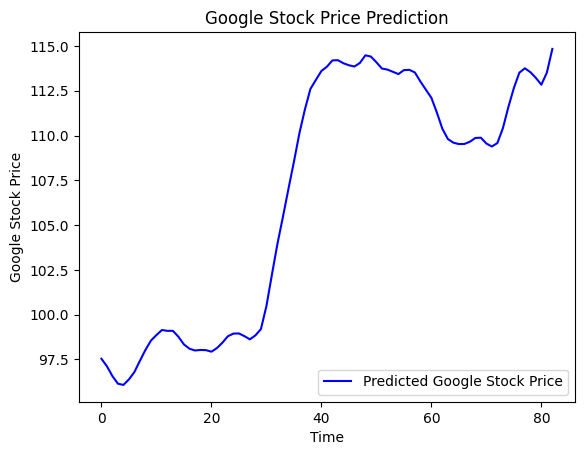

In [12]:
# plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()